#### Sentiment Analysis on Movie Reviews

#### Krunal Dave

#### Date : 06/06/2024
#### (1)


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mlt
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
#read data
df_train=pd.read_csv("train.tsv",sep = '\t',index_col=False)
df_test=pd.read_csv("test.tsv",sep = '\t')

In [3]:
df_test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


#### Data preprocessing and EDA

In [4]:
df_train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [5]:

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


from the above code, it is clear that there are three independent and one dependent variable present in the dataset
Size of the dataset is 156060 and contains integer as well as object type of data

<Axes: >

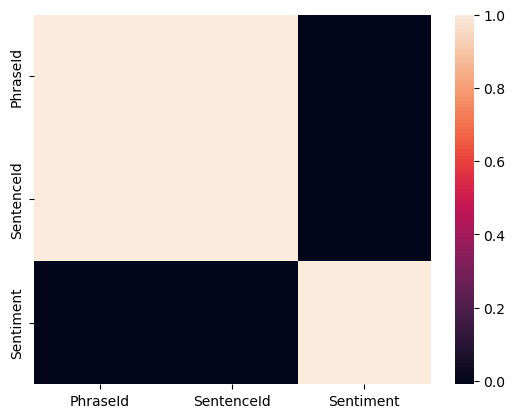

In [6]:
sns.heatmap(df_train.corr(numeric_only=True))

The feature "Phrase" is not a numerical variable. Now we will add new feature which will
the length of the phrases as a new column

In [7]:
df_train["Phrase len"]=df_train["Phrase"][:].str.split(" ").str.len()

In [8]:
df_train.head()

,PhraseId,SentenceId,Phrase,Sentiment,Phrase len
0,1,1,A series of escapades demonstrating the adage ...,1,37
1,2,1,A series of escapades demonstrating the adage ...,2,14
2,3,1,A series,2,2
3,4,1,A,2,1
4,5,1,series,2,1


In [9]:
(df_train.corr())

C:\Users\Krunal dave\AppData\Local\Temp\ipykernel_8540\1019195399.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df_train.corr())


,PhraseId,SentenceId,Sentiment,Phrase len
PhraseId,1.000000,0.999573,-0.009547,0.065190
SentenceId,0.999573,1.000000,-0.009683,0.064442
Sentiment,-0.009547,-0.009683,1.000000,-0.016379
Phrase len,0.065190,0.064442,-0.016379,1.000000


Model building



In [10]:
# We need to split our data
from sklearn.model_selection import train_test_split

y=df_train["Sentiment"]
X=df_train.drop(["Sentiment",],axis=1)

# splitting into test and train set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [11]:
# Now as the feature "Phrase" contains text, lets find out meaningfull information 

from sklearn.feature_extraction.text import TfidfVectorizer

# Define a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer to your training data (learn vocabulary and IDF weights)
vectorizer.fit(X_train['Phrase'])

# Transform training and testing data (using the fitted vectorizer)
X_train_TF = vectorizer.transform(X_train['Phrase'])
X_test_TF = vectorizer.transform(X_test['Phrase'])

In [12]:
df_test2=vectorizer.transform(df_test['Phrase'])

In [ ]:
# Building the model

model=RandomForestClassifier(n_estimators=100)

model.fit(X_train_TF,y_train)


RandomForestClassifier()

In [ ]:
# Now lets predict the outcome
pred=model.predict(X_test_TF)

# evaluate the result
print(accuracy_score(pred,y_test))


0.6374150967576573


In [ ]:
#Now make prediction on the given problem
prediction_test=model.predict(df_test2)

In [ ]:
#Save the results
phrase_ids=df_test['PhraseId']

submission = pd.DataFrame({
    'PhraseId': phrase_ids,
    'Sentiment': prediction_test
})
submission.head()

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2


submission.to_csv("sentiment_with_RF.csv",index=False)

In [13]:
# Model: 2 - Linear regression model

LRmodel=LogisticRegression(max_iter=1000)
LRmodel.fit(X_train_TF,y_train)

LogisticRegression(max_iter=1000)

In [14]:
# Now lets predict the outcome for linear regression model
pred_LR=(LRmodel.predict(X_test_TF))

# evaluate the result
print(accuracy_score(pred_LR,y_test))

0.6382160707420222


The accuracy for the linear regression model is better than the random forest. 
So, now training this model in full dataset

In [15]:
# Now as the feature "Phrase" contains text, lets find out meaningfull information 

from sklearn.feature_extraction.text import TfidfVectorizer

# Define a TfidfVectorizer object
vectorizer2 = TfidfVectorizer()

# Fit the vectorizer to your training data (learn vocabulary and IDF weights)
vectorizer2.fit(X['Phrase'])

# Transform training and testing data (using the fitted vectorizer)
X_tf= vectorizer.transform(X['Phrase'])


In [16]:
LRmodel_final=LogisticRegression(max_iter=1000)
LRmodel_final.fit(X_tf,y)

LogisticRegression(max_iter=1000)

In [17]:
#now predict the test dataset
prediction_test_LR=LRmodel_final.predict(df_test2)


In [18]:
#Save the results
phrase_ids=df_test['PhraseId']

submission2 = pd.DataFrame({
    'PhraseId': phrase_ids,
    'Sentiment': prediction_test_LR
})
submission2.head()

,PhraseId,Sentiment
0,156061,3
1,156062,3
2,156063,2
3,156064,2
4,156065,2


In [19]:
submission2.to_csv("sentiment_with_LR.csv",index=False)